In [ ]:
import os
import sys
import joblib

import sys
sys.path.append("..")  # points to project root

import pandas as pd
from src.data import load_data, build_datasets
from src.preprocessing import setup_nltk_data

# ============DATASET==============

print("Setup nltk...")
setup_nltk_data()

print("Read Data...")
# Read Data
filename = "../data/training_data.csv"

df = load_data(filename)
X = df.text
y = df.labels

print("Create the Datasets...")
# Build Dataset with clean and preprocessing
X_train, X_test, y_train, y_test = build_datasets(X, y)


Setup nltk...
Read Data...
Create the Datasets...


In [4]:
import joblib

# Load the saved pipeline
loaded_model = joblib.load("../outputs/models/logreg_best_pipeline.joblib")

# Predict on brand new data
# new_texts = ["This bootcamp is highly educational!", "I did not understand the assignment."]
predictions = loaded_model.predict(X_test)

print(predictions)


[0 1 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3564
           1       0.93      0.94      0.94      3267

    accuracy                           0.94      6831
   macro avg       0.94      0.94      0.94      6831
weighted avg       0.94      0.94      0.94      6831



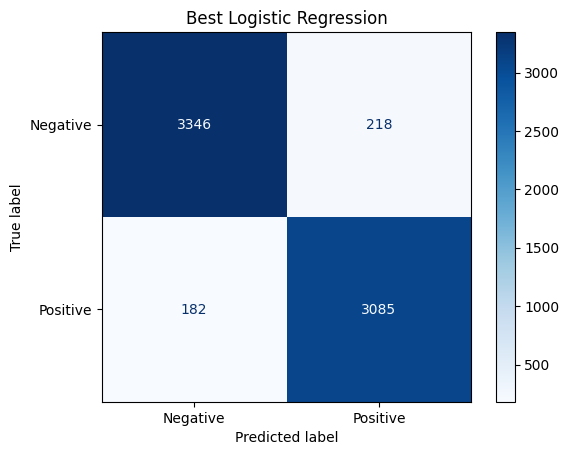

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictions)
classes = ["Negative", "Positive"] 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap="Blues")
plt.title("Best Logistic Regression")
plt.show()